In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare, kstest, chi2, norm

## Linear Congruential Generator (LCG)

In [15]:
def lcg(a, c, M, n, x0):
    x = x0  
    random_numbers = []
    
    for _ in range(n):
        x = (a * x + c) % M
        random_numbers.append(x/M)
    
    return random_numbers

In [ ]:
a = 129 # from slide, suggested starting values
c = 26461
M = 65536  
n = 10000
x0 = 783

In [17]:
numbers = lcg(a, c, M, n, x0)

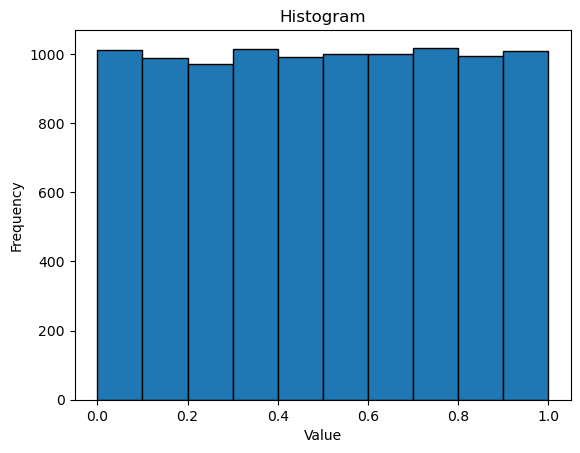

In [18]:
plt.hist(numbers, bins=10, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

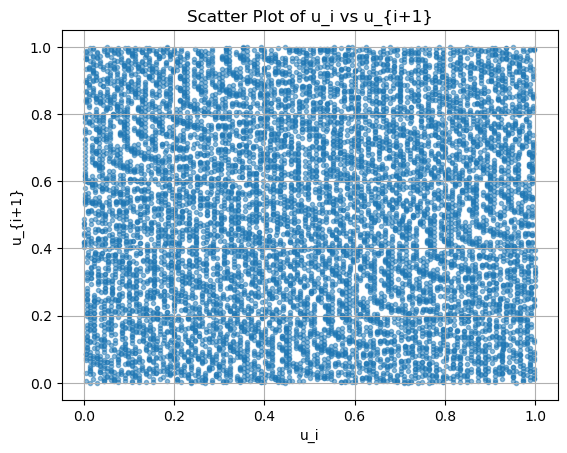

In [19]:
plt.scatter(numbers[:-1], numbers[1:], alpha=0.5, marker='.')
plt.title('Scatter Plot of u_i vs u_{i+1}')
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.grid()
plt.show()

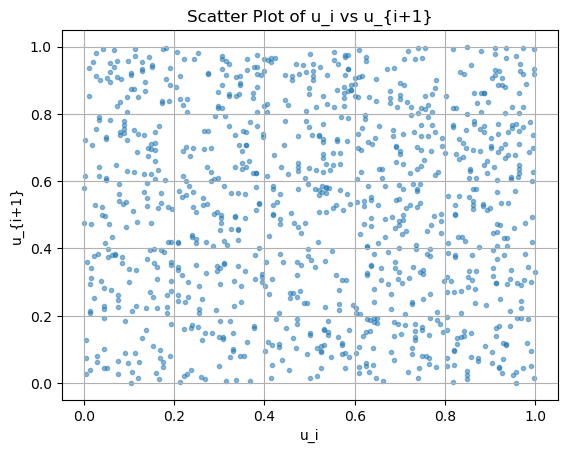

In [20]:
plt.scatter(numbers[:1000], numbers[1:1001], alpha=0.5, marker='.')
plt.title('Scatter Plot of u_i vs u_{i+1}')
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.grid()
plt.show()

## $\chi^2$ test

In [21]:
def chi_squared(numbers, n_classes=10):
    class_bounds = [i / n_classes for i in range(n_classes + 1)]
    expected_count = len(numbers) / n_classes
    T = 0
    for i in range(n_classes):
        observed_count = sum(1 for x in numbers if class_bounds[i] <= x < class_bounds[i + 1])
        T += (observed_count - expected_count) ** 2 / expected_count
    return T

In [22]:
chi_squared(numbers)

1.866

Compare with scipy:

In [23]:
hist, _ = np.histogram(numbers, bins=10, range=(0, 1))
expected = [len(numbers) / 10] * 10
chi2_stat, p_value = chisquare(f_obs=hist, f_exp=expected)
print(f"Chi² Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi² Statistic: 1.866
P-value: 0.9934136169096531


## Kolmogorov-Smirnov test

In [24]:
def kolmogorov_smirnov_test(numbers):
    sorted_numbers = np.sort(numbers)
    theoretical_cdf = np.arange(0, 1, 1/len(numbers))# For uniform [0,1], CDF at x is x
    empirical_cdf = sorted_numbers  
    D = np.max(np.abs(empirical_cdf - theoretical_cdf))
    return D, (theoretical_cdf, empirical_cdf)

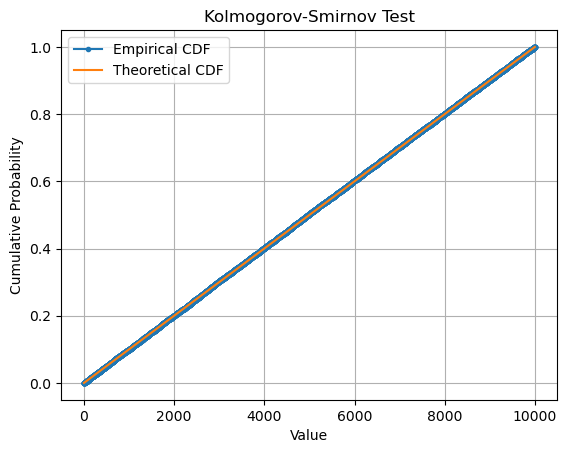

In [25]:
D, (theoretical_cdf, empirical_cdf) = kolmogorov_smirnov_test(numbers)
plt.plot(empirical_cdf, label='Empirical CDF', marker='.')
plt.plot(theoretical_cdf, label='Theoretical CDF', linestyle='-')
plt.title('Kolmogorov-Smirnov Test')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()

In [26]:
D, _ = kolmogorov_smirnov_test(numbers)
(np.sqrt(n)+0.12+(0.11/np.sqrt(n)))*D

0.3949063641064453

In [27]:
D

0.003944287109375

Compare with scipy:

In [28]:
sample = numbers 
statistic, p_value = kstest(sample, 'uniform',N=10000)
print(f"K-S Statistic: {statistic}")
print(f"P-value: {p_value}")

K-S Statistic: 0.003944287109375
P-value: 0.9975678772271175


## Up/Down test from Knuth

In [29]:
def run_lengths(numbers):
    runs = []
    current_run_length = 1
    
    for i in range(1, len(numbers)):
        if numbers[i] >= numbers[i - 1]:
            current_run_length += 1
        else:
            runs.append(current_run_length)
            current_run_length = 1
            
    runs.append(current_run_length)  
    return runs

In [30]:
runs = run_lengths(numbers)
R = sum(1 for run in runs if run == 1), sum(1 for run in runs if run == 2), sum(1 for run in runs if run == 3), sum(1 for run in runs if run == 4), sum(1 for run in runs if run == 5), sum(1 for run in runs if run >= 6)
R

(1669, 2149, 819, 272, 88, 8)

In [31]:
A = np.array([[4529.4, 9044.9 ,13568, 18091 ,22615, 27892],
[9044.9 ,18097 ,27139 ,36187 ,45234 ,55789],
[13568 ,27139 ,40721 ,54281 ,67852 ,83685],
[18091 ,36187 ,54281 ,72414 ,90470 ,111580],
[22615, 45234 ,67852 ,90470 ,113262 ,139476],
[27892 ,55789 ,83685 ,111580 ,139476 ,172860]])
b = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])

In [32]:
Z = (1/(n-6))*np.matmul((R-n*b).T,np.matmul(A,(R-n*b)))
Z

31.453947974728333

In [33]:
p_value = 1 - chi2.cdf(Z, 6)
print(f"P-value: {p_value:.6f}")

P-value: 0.000021


## Correlation test

[0.250597111103606, 0.25077503835544407, 0.2505870982316116, 0.2508230019762248, 0.2505088925381201, 0.25129133843754287, 0.25098664352567235, 0.25073957101718186, 0.25116491319967565, 0.2506973131015585, 0.2506428690150228, 0.2508045844507598, 0.25073976862147607, 0.250564066962693, 0.2514842720764783, 0.25126731434638483, 0.25087290748485125, 0.2506472395678745, 0.2501866532515411, 0.25033070895627685, 0.25088532495088683, 0.2510554576827225, 0.250650087794517, 0.25088986705956157, 0.25071289415291526, 0.2510580334442684, 0.25100249344966563, 0.25084455702127906, 0.25097006094065594, 0.2507824960636225, 0.2504425465515802, 0.2510603530125776, 0.25055541488849087, 0.25092866619108867, 0.2510540270213387, 0.250049354897022, 0.2502369012852452, 0.25077927117148546, 0.25056978773193667, 0.2513193545708747, 0.2505663606539355, 0.2503084215982227, 0.2508374541249447, 0.2509268020973707, 0.2511663198414002, 0.2512310404479584, 0.25074799009783594, 0.251001465862012, 0.25122630047082073, 0.2

Text(0.5, 1.0, 'Correlation Coefficient vs Lag')

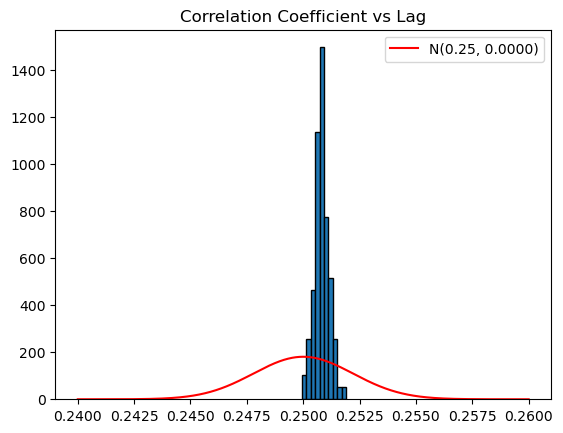

In [34]:
def correlation_coefficient(numbers, h):
    n = len(numbers)
    s = 0
    for i in range(1, n - h):
        s += numbers[i] * numbers[i + h]
    return s / (n - h)

c = []
for h in range(1, 100):
    c.append(correlation_coefficient(numbers,h))
print(c)
    
plt.hist(c, bins=10, edgecolor='black', density=True)
mu = 0.25
variance = 7 / (144 * n)
sigma = np.sqrt(variance)
x = np.linspace(0.24, 0.26, 1000)
pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, 'r-', label=f'N({mu}, {variance:.4f})')
plt.legend()
plt.title('Correlation Coefficient vs Lag')

## System available generator

In [54]:
numbers = np.random.uniform(0, 1, 10000)

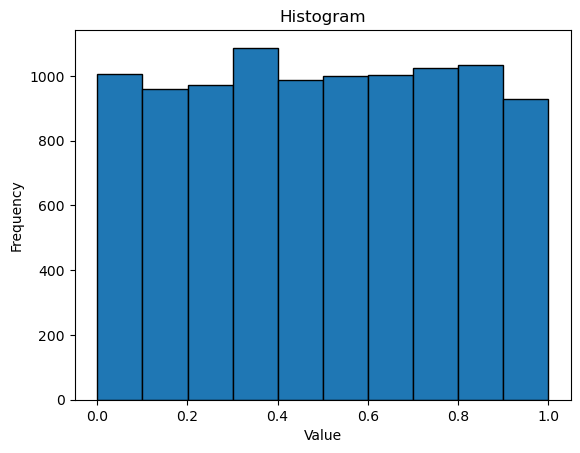

In [55]:
plt.hist(numbers, bins=10, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

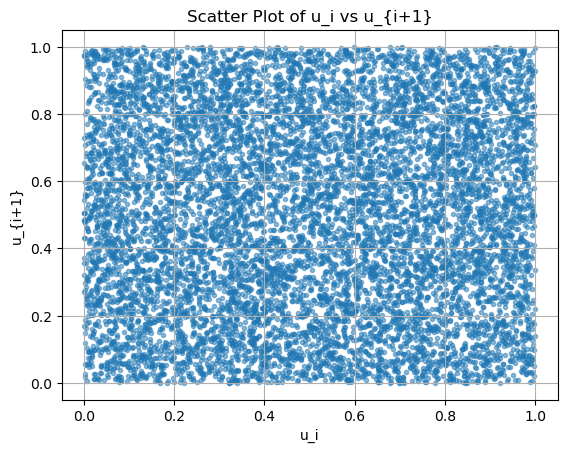

In [56]:
plt.scatter(numbers[:-1], numbers[1:], alpha=0.5, marker='.')
plt.title('Scatter Plot of u_i vs u_{i+1}')
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.grid()
plt.show()

In [57]:
chi_squared(numbers)

16.246

In [58]:
runs = run_lengths(numbers)
R = sum(1 for run in runs if run == 1), sum(1 for run in runs if run == 2), sum(1 for run in runs if run == 3), sum(1 for run in runs if run == 4), sum(1 for run in runs if run == 5), sum(1 for run in runs if run >= 6)
Z = (1/(n-6))*np.matmul((R-n*b).T,np.matmul(A,(R-n*b)))
p_value = 1 - chi2.cdf(Z, 6)
print(f"P-value: {p_value:.6f}")

P-value: 0.809596


[0.250141529977845, 0.2501364384818207, 0.24954707413609542, 0.24851602702103331, 0.2491186420713654, 0.2496076798770013, 0.247566698234009, 0.2501884381995947, 0.24811631464408282, 0.2501853835844405, 0.2483859358285365, 0.25008474738151537, 0.24849723990963932, 0.24949932367501346, 0.24934010343698101, 0.24867006717530166, 0.24993716092771986, 0.2487470098910131, 0.24953117951966935, 0.24908693264432644, 0.2485077743517495, 0.24938313878214424, 0.25000371379903324, 0.24927542993375984, 0.24890668533917845, 0.2479859332268446, 0.24991560818726521, 0.2501230901151994, 0.24913817261639506, 0.2505813050219008, 0.24940921494910662, 0.2491655006183141, 0.24912789349079872, 0.2471207660544218, 0.249614955312808, 0.24933338139084274, 0.24848146569798765, 0.2503886831920837, 0.24871485951379602, 0.24763356402139877, 0.24984470424612154, 0.24801696711791463, 0.24905541700670586, 0.24932077577624537, 0.24948747417944647, 0.24966519446051016, 0.24908165646806954, 0.25003714408045535, 0.249161486

Text(0.5, 1.0, 'Correlation Coefficient vs Lag')

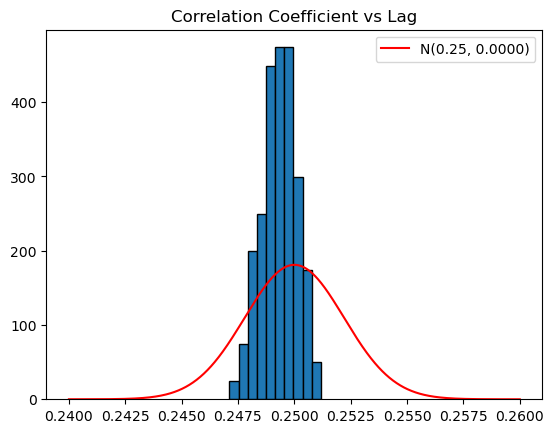

In [65]:
c = []
for h in range(1, 100):
    c.append(correlation_coefficient(numbers,h))
print(c)
    
plt.hist(c, bins=10, edgecolor='black', density=True)
mu = 0.25
variance = 7 / (144 * n)
sigma = np.sqrt(variance)
x = np.linspace(0.24, 0.26, 1000)
pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, 'r-', label=f'N({mu}, {variance:.4f})')
plt.legend()
plt.title('Correlation Coefficient vs Lag')

## Experimenting with different values

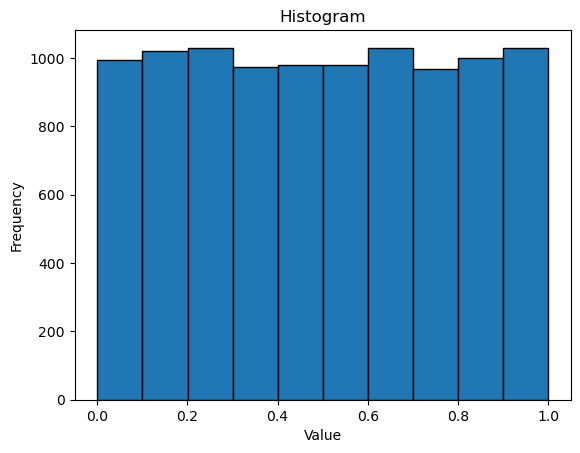

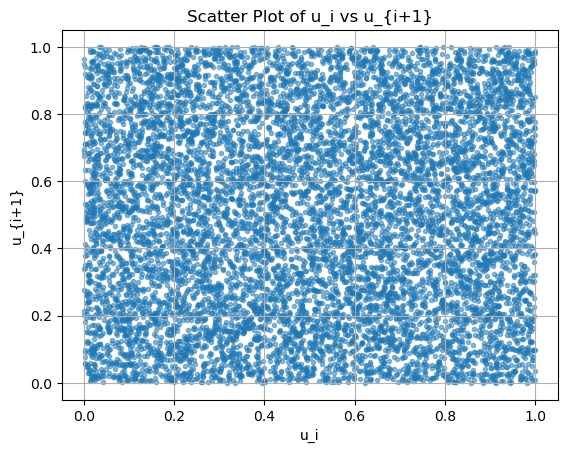

5.356
P-value: 0.371587
[0.25113857409030377, 0.24926484666710286, 0.24995489445899813, 0.25064622145446375, 0.2502009390626654, 0.24985407890401784, 0.24930624110956717, 0.2497028148987328, 0.2507426900659066, 0.24977750901982643, 0.2506759968991487, 0.24871906386115786, 0.24964804156220985, 0.24920174174010412, 0.24920772678465664, 0.24922001296597338, 0.24904591142909555, 0.2489457190506167, 0.24919864971827857, 0.24829629856832, 0.24979833727205109, 0.2503873159149841, 0.24963758952063544, 0.2494002732436657, 0.24865813006679818, 0.24892650746216224, 0.2509551164489941, 0.2495436320114895, 0.2494371539389694, 0.2503883812084476, 0.24988298346654086, 0.24935271735850087, 0.24908022982106437, 0.2494301299118067, 0.2500137979904445, 0.24905197035305948, 0.25093290740022517, 0.24891603362170828, 0.2505607913733159, 0.24988270060462675, 0.2508590204504213, 0.24923881004603554, 0.24826908537414652, 0.24895368696237716, 0.25068713788869285, 0.24804954438866691, 0.2501432957385328, 0.25126

Text(0.5, 1.0, 'Correlation Coefficient vs Lag')

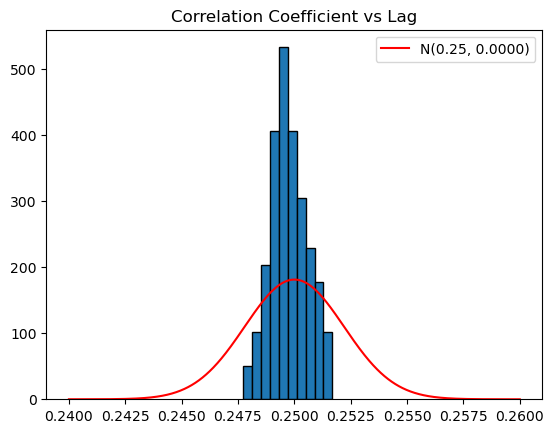

In [ ]:
# good:
a = 1664525
c = 1013904223
M = 2**32 
n = 10000
x0 = 0

numbers = lcg(a, c, M, n, x0)

plt.hist(numbers, bins=10, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.scatter(numbers[:-1], numbers[1:], alpha=0.5, marker='.')
plt.title('Scatter Plot of u_i vs u_{i+1}')
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.grid()
plt.show()

print(chi_squared(numbers))

runs = run_lengths(numbers)
R = sum(1 for run in runs if run == 1), sum(1 for run in runs if run == 2), sum(1 for run in runs if run == 3), sum(1 for run in runs if run == 4), sum(1 for run in runs if run == 5), sum(1 for run in runs if run >= 6)
Z = (1/(n-6))*np.matmul((R-n*b).T,np.matmul(A,(R-n*b)))
p_value = 1 - chi2.cdf(Z, 6)
print(f"P-value: {p_value:.6f}")

c = []
for h in range(1, 100):
    c.append(correlation_coefficient(numbers,h))
print(c)
    
plt.hist(c, bins=10, edgecolor='black', density=True)
mu = 0.25
variance = 7 / (144 * n)
sigma = np.sqrt(variance)
x = np.linspace(0.24, 0.26, 1000)
pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, 'r-', label=f'N({mu}, {variance:.4f})')
plt.legend()
plt.title('Correlation Coefficient vs Lag')

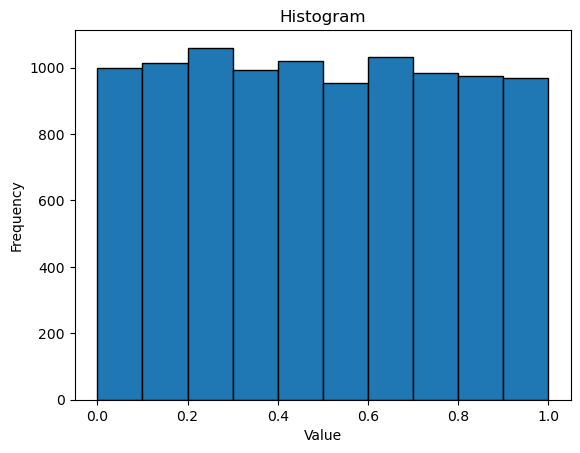

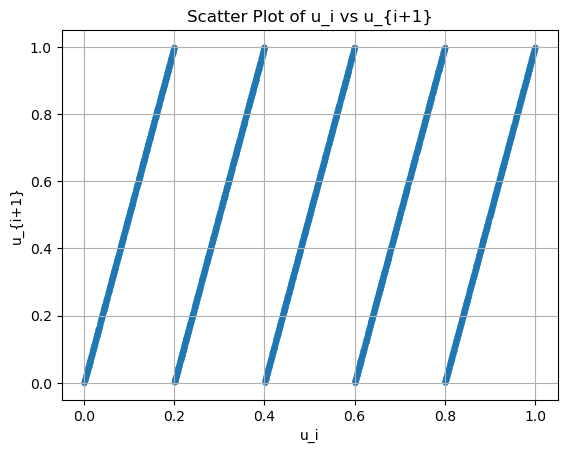

9.422
P-value: 0.000000
[0.26227417757998434, 0.24856256718170155, 0.24593205414779504, 0.24564598950581354, 0.2457267059243865, 0.24567539150593104, 0.24551110171817223, 0.24639257551174149, 0.246134411970025, 0.24563111452813688, 0.2470554738473425, 0.24552382557783153, 0.24529909162142507, 0.24551094264230747, 0.24605418863329936, 0.24572057205806722, 0.24651044368062686, 0.24653085912743883, 0.24616864798095067, 0.24560647986557257, 0.24564639871726482, 0.2453189732938651, 0.24572072976503223, 0.24529047647767713, 0.2450438271760287, 0.2458992536163941, 0.24722538562972465, 0.24530178120767815, 0.2466106738067346, 0.24617957639953528, 0.24567885256534666, 0.24524733097492707, 0.24583857241389875, 0.24614842047586105, 0.24619177435148587, 0.2452600167159506, 0.24645649254607907, 0.24548705410176005, 0.2444280473409366, 0.24567486250959616, 0.24568383016246034, 0.24446640879617787, 0.24580412737140728, 0.24614618936115906, 0.2456623629394625, 0.24588304032362596, 0.24624828258723, 0.

Text(0.5, 1.0, 'Correlation Coefficient vs Lag')

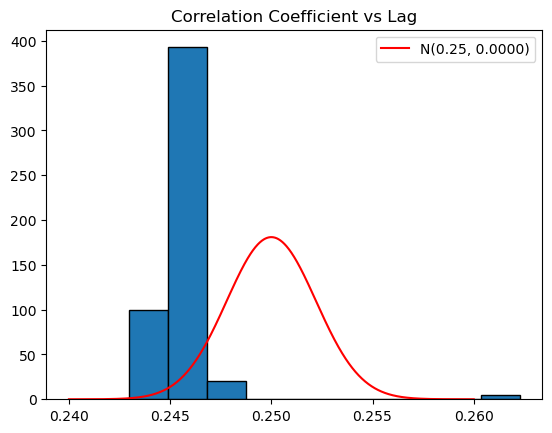

In [ ]:
# bad
a = 5
c = 1
M = 2**16
n = 10000
x0 = 0

numbers = lcg(a, c, M, n, x0)

plt.hist(numbers, bins=10, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.scatter(numbers[:-1], numbers[1:], alpha=0.5, marker='.')
plt.title('Scatter Plot of u_i vs u_{i+1}')
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.grid()
plt.show()

print(chi_squared(numbers))

runs = run_lengths(numbers)
R = sum(1 for run in runs if run == 1), sum(1 for run in runs if run == 2), sum(1 for run in runs if run == 3), sum(1 for run in runs if run == 4), sum(1 for run in runs if run == 5), sum(1 for run in runs if run >= 6)
Z = (1/(n-6))*np.matmul((R-n*b).T,np.matmul(A,(R-n*b)))
p_value = 1 - chi2.cdf(Z, 6)
print(f"P-value: {p_value:.6f}")

c = []
for h in range(1, 100):
    c.append(correlation_coefficient(numbers,h))
print(c)
    
plt.hist(c, bins=10, edgecolor='black', density=True)
mu = 0.25
variance = 7 / (144 * n)
sigma = np.sqrt(variance)
x = np.linspace(0.24, 0.26, 1000)
pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, 'r-', label=f'N({mu}, {variance:.4f})')
plt.legend()
plt.title('Correlation Coefficient vs Lag')